In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\"

In [2]:
load_folder = 'C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\'
peakLoad = pd.read_excel(load_folder + 'Peakload.xlsx')
load = pd.read_excel(load_folder + 'load.xlsx')
load = load.sort_values(by=['building id'])
load = load.reset_index()
load = load.drop(['index'], axis=1)
peakLoad['Load'] = load['Load']
peakLoad['Load Factor'] = peakLoad['Load']/(peakLoad['Peak Load']*8760)
peakLoad = peakLoad.drop(['Unnamed: 0'], axis=1)

peakLoad

,building id,Peak Load,Load,Load Factor
0,1,27.724174,58015.584978,0.238881
1,2,20.164945,41411.346548,0.234433
2,3,18.771555,36953.435376,0.224725
3,4,16.617412,31673.736508,0.217586
4,5,27.902137,59150.390389,0.242000
...,...,...,...,...
395,396,12.189566,23415.204886,0.219283
396,397,12.662940,24918.728631,0.224640
397,398,4.833286,7854.976581,0.185523
398,399,14.577960,28841.437895,0.225848


In [3]:
rate = 'Fixed_Rate'

In [11]:
# Total costs:
cost_GF = pd.read_excel(ResultsFolder+'gas_furnance_salt_Fixed_Rate_Opt_Size_MgSO4.xlsx')
cost_noTES = pd.read_excel(ResultsFolder + 'costs_noTES_' + rate +'.xlsx')
cost_ref = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + 'Opt_Size' + '_MgSO4'+'.xlsx')

# Clean up:
cost_GF = cost_GF.rename(columns={'Unnamed: 0': 'building id'})
cost_GF = cost_GF.sort_values(by=['building id'])
cost_GF = cost_GF.reset_index()
cost_GF = cost_GF[['building id', 'Saving GF', 'Saving GF %']]

cost_noTES = cost_noTES.rename(columns={'Unnamed: 0': 'building id'})
cost_noTES = cost_noTES.sort_values(by=['building id'])
cost_noTES = cost_noTES.reset_index()
cost_noTES = cost_noTES[['building id', 'total cost ($)']]

cost_ref = cost_ref.rename(columns={'Unnamed: 0': 'building id'})
cost_ref = cost_ref.sort_values(by=['building id'])
cost_ref = cost_ref.reset_index()
cost_ref = cost_ref[['building id', 'total cost ($)']]

cost_ref

,building id,total cost ($)
0,1,3411.853730
1,2,2439.361398
2,3,2175.504185
3,4,1868.762140
4,5,3476.731842
...,...,...
395,396,1387.327722
396,397,1487.147655
397,398,473.586949
398,399,1707.027850


In [13]:
# Find changes in total costs:
cost_impacts_TES = pd.DataFrame()
cost_impacts_TES['building id'] = cost_noTES['building id']
cost_impacts_TES['total cost - no TES'] = cost_noTES['total cost ($)']
cost_impacts_TES['total cost - Ref'] = cost_ref['total cost ($)']
cost_impacts_TES['peak load'] = peakLoad['Peak Load']

cost_impacts_TES['Saving BB'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - Ref']
cost_impacts_TES['Saving BB %'] = cost_impacts_TES['Saving BB']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['Saving GF'] = cost_GF['Saving GF']
cost_impacts_TES['Saving GF %'] = cost_GF['Saving GF %']
cost_impacts_TES

cost_impacts_TES
#cost_impacts_TES.to_excel("C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\cost_saving.xlsx")

,building id,total cost - no TES,total cost - Ref,peak load,Saving BB,Saving BB %,Saving GF,Saving GF %
0,1,3526.290877,3411.853730,27.724174,114.437147,0.032453,70.893902,0.021929
1,2,2523.385394,2439.361398,20.164945,84.023996,0.033298,52.556507,0.022774
2,3,2254.533101,2175.504185,18.771555,79.028916,0.035053,48.481528,0.023564
3,4,1938.359969,1868.762140,16.617412,69.597829,0.035906,42.777889,0.024218
4,5,3591.834993,3476.731842,27.902137,115.103151,0.032046,70.854031,0.021522
...,...,...,...,...,...,...,...,...
395,396,1436.920123,1387.327722,12.189566,49.592401,0.034513,29.289459,0.022299
396,397,1535.499790,1487.147655,12.662940,48.352134,0.031490,29.034091,0.020750
397,398,491.584576,473.586949,4.833286,17.997627,0.036611,10.123000,0.022790
398,399,1766.304961,1707.027850,14.577960,59.277111,0.033560,35.763009,0.022160


In [14]:

cost_impacts_TES = pd.merge(cost_impacts_TES, peakLoad, on=["building id"])
#cost_impacts_TES["cost saving %"] = cost_impacts_TES["cost saving %"]*3.9
cost_impacts_TES


,building id,total cost - no TES,total cost - Ref,peak load,Saving BB,Saving BB %,Saving GF,Saving GF %,Peak Load,Load,Load Factor
0,1,3526.290877,3411.853730,27.724174,114.437147,0.032453,70.893902,0.021929,27.724174,58015.584978,0.238881
1,2,2523.385394,2439.361398,20.164945,84.023996,0.033298,52.556507,0.022774,20.164945,41411.346548,0.234433
2,3,2254.533101,2175.504185,18.771555,79.028916,0.035053,48.481528,0.023564,18.771555,36953.435376,0.224725
3,4,1938.359969,1868.762140,16.617412,69.597829,0.035906,42.777889,0.024218,16.617412,31673.736508,0.217586
4,5,3591.834993,3476.731842,27.902137,115.103151,0.032046,70.854031,0.021522,27.902137,59150.390389,0.242000
...,...,...,...,...,...,...,...,...,...,...,...
395,396,1436.920123,1387.327722,12.189566,49.592401,0.034513,29.289459,0.022299,12.189566,23415.204886,0.219283
396,397,1535.499790,1487.147655,12.662940,48.352134,0.031490,29.034091,0.020750,12.662940,24918.728631,0.224640
397,398,491.584576,473.586949,4.833286,17.997627,0.036611,10.123000,0.022790,4.833286,7854.976581,0.185523
398,399,1766.304961,1707.027850,14.577960,59.277111,0.033560,35.763009,0.022160,14.577960,28841.437895,0.225848


In [7]:
cost_impacts_TES.max()
#ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - MgSO4')
#ordered_cost
#ordered_cost.to_csv('C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\ordered_cost.csv')
#ordered_cost.plot.scatter(x = 'Load Factor', y = 'cost saving % - MgSO4', s = 50)

building id                        400.000000
total cost - no TES               3866.092793
total cost - Ref                  3736.558056
total cost - Constant 100         3730.340530
total cost - Constant 10          3834.314878
total cost - Constant Peak        3716.527849
cost saving - Ref                  129.534737
cost saving % - Ref                  0.046018
cost saving - Constant 100         135.752264
cost saving % - Constant 100         0.048352
cost saving - Constant 10           31.777916
cost saving % - Constant 10          0.012009
cost saving - Constant Peak        149.564944
cost saving % - Constant Peak        0.052824
peak load                           30.477053
Peak Load                           30.477053
Load                             63936.968704
Load Factor                          0.280478
dtype: float64

In [15]:
# Dot plot:
ordered_cost_reset = cost_impacts_TES.sort_values(by='peak load')
ordered_cost_reset = ordered_cost_reset.reset_index()
ordered_cost_reset['building'] = ordered_cost_reset.index + 1
ordered_cost_reset

,index,building id,total cost - no TES,total cost - Ref,peak load,Saving BB,Saving BB %,Saving GF,Saving GF %,Peak Load,Load,Load Factor,building
0,304,305,280.292317,269.204534,2.931349,11.087784,0.039558,6.301362,0.024848,2.931349,4494.552000,0.175031,1
1,210,211,320.706929,306.432181,3.267824,14.274748,0.044510,8.089794,0.027926,3.267824,5129.930228,0.179204,2
2,233,234,302.507901,288.808238,3.335892,13.699663,0.045287,7.486781,0.027491,3.335892,4804.581801,0.164414,3
3,338,339,351.177610,336.725184,3.346160,14.452427,0.041154,8.432223,0.026454,3.346160,5666.573658,0.193317,4
4,99,100,439.196709,421.669956,4.456120,17.526753,0.039906,9.706231,0.024401,4.456120,7017.284235,0.179766,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,385,386,3466.234461,3356.766936,27.341019,109.467525,0.031581,67.297413,0.021221,27.341019,56719.004778,0.236815,396
396,0,1,3526.290877,3411.853730,27.724174,114.437147,0.032453,70.893902,0.021929,27.724174,58015.584978,0.238881,397
397,4,5,3591.834993,3476.731842,27.902137,115.103151,0.032046,70.854031,0.021522,27.902137,59150.390389,0.242000,398
398,399,400,3539.585834,3424.820699,28.411462,114.765136,0.032423,70.021947,0.021623,28.411462,57919.433045,0.232716,399


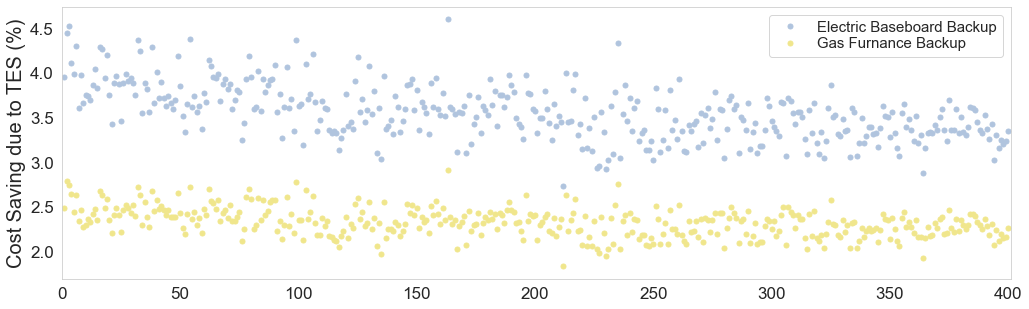

In [17]:
fig, ax = plt.subplots(figsize=(17,5))

ax.plot(ordered_cost_reset['building'], ordered_cost_reset['Saving BB %']*100, marker='o', ms=5, linestyle='',color = 'lightsteelblue', label='Electric Baseboard Backup')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['Saving GF %']*100, marker='o', ms=5, linestyle='',color = 'khaki', label='Gas Furnance Backup')

ax.yaxis.set_visible(True)
ax.grid(False)
#ax.set_ylim(-1, max(counts))
ax.set_xlim(0, 401)
#ax.set_xticks(range(min(ordered_cost['building id']), max(ordered_cost['building id'])))
#plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES (%)", fontsize=20)
ax.tick_params(length=0, pad=8, labelsize=17)
ax.legend(fontsize=15, labelspacing=0.15, loc = 'best')
fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/cost_saving_pct_GF.png', dpi=300, bbox_inches='tight')

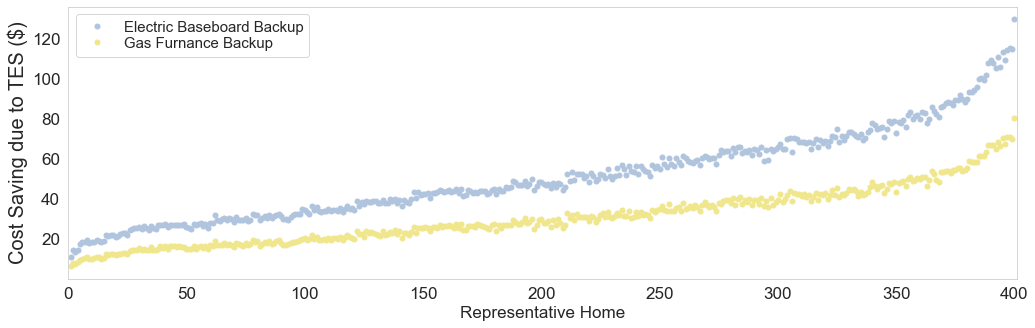

In [18]:
fig, ax = plt.subplots(figsize=(17,5))

ax.plot(ordered_cost_reset['building'], ordered_cost_reset['Saving BB'], marker='o', ms=5, linestyle='',color = 'lightsteelblue', label='Electric Baseboard Backup')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['Saving GF'], marker='o', ms=5, linestyle='',color = 'khaki', label='Gas Furnance Backup')

ax.yaxis.set_visible(True)
ax.grid(False)
#ax.set_ylim(-1, max(counts))
ax.set_xlim(0, 401)
#ax.set_xticks(range(min(ordered_cost['building id']), max(ordered_cost['building id'])))
plt.xlabel("Representative Home",fontsize=17)
plt.ylabel("Cost Saving due to TES ($)", fontsize=20)
ax.tick_params(length=0, pad=8, labelsize=17)
ax.legend(fontsize=15, labelspacing=0.15)
fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/cost_saving_GF.png', dpi=300, bbox_inches='tight')

In [24]:
ordered_cost_reset.sum()/1000000*664.3

index                    53.011140
building id              53.276860
total cost - no TES     392.815293
total cost - Ref        379.162585
peak load                 3.332323
Saving BB                13.652708
Saving BB %               0.009466
Saving GF                 8.224188
Saving GF %               0.006189
Peak Load                 3.332323
Load                   6412.718321
Load Factor               0.057024
building                 53.276860
dtype: float64